In [1]:
#Importing all the libaries required .
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

C:\Users\nikhi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Ignoring the warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Changing the working directory to my local location.
import os
os.getcwd()

'C:\\Users\\nikhi'

In [6]:
os.chdir(r'C:\Users\nikhi\Desktop\preparation\proj\manchester')

In [7]:
df = pd.read_csv('adverts.csv')

In [8]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


The dataset has wide range of values from NaN to catogorical values and also we can see few missing values as well.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


The data is complosed of different data types.

In [10]:
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


Outlier : `year_of_registration` has a min value of 999, and `price` max is extremely high.


Insight:

`year_of_registration` has a positive correlation with price (+0.56)

`mileage` has a negative correlation with price (−0.52)

`vehicle_age` has strong negative correlation with price (−0.56)

Newer vehicles with lower mileage tend to have higher prices, as indicated by the positive correlation with registration year and negative correlation with mileage.

In [12]:
# Missing values count
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False))


Missing Values:
year_of_registration     33311
reg_code                 31857
standard_colour           5378
body_type                  837
fuel_type                  601
mileage                    127
public_reference             0
standard_make                0
standard_model               0
vehicle_condition            0
price                        0
crossover_car_and_van        0
dtype: int64


In [13]:
# Total missing values
df.isnull().sum().sum()

72111

There are 72111 missing values in total, which needs to be handled.

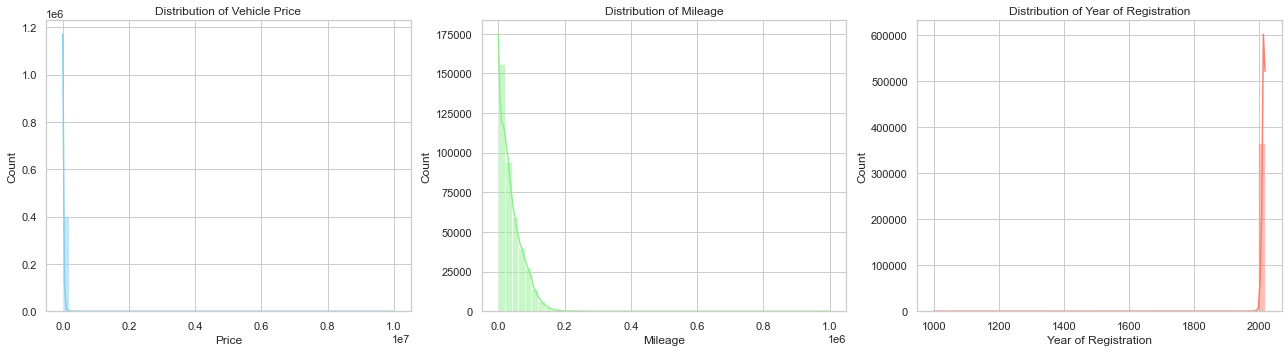

In [14]:
# Histogram of numerical columns

# Set plot style
sns.set(style="whitegrid")

# Visualizations of distributions
plt.figure(figsize=(18, 5))

# Price distribution
plt.subplot(1, 3, 1)
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Vehicle Price')
plt.xlabel('Price')

# Mileage distribution
plt.subplot(1, 3, 2)
sns.histplot(df['mileage'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')

# Year of registration distribution
plt.subplot(1, 3, 3)
sns.histplot(df['year_of_registration'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Year of Registration')
plt.xlabel('Year of Registration')

plt.tight_layout()
plt.show()


1. `Price` is right-skewed, indicating most cars are priced low but a few luxury cars pull the average up.
2. `Mileage` also shows right skewness, suggesting a few vehicles have exceptionally high mileage.
3. `Year of registration` has a central peak around 2015–2018, with a few anomalies like 999.



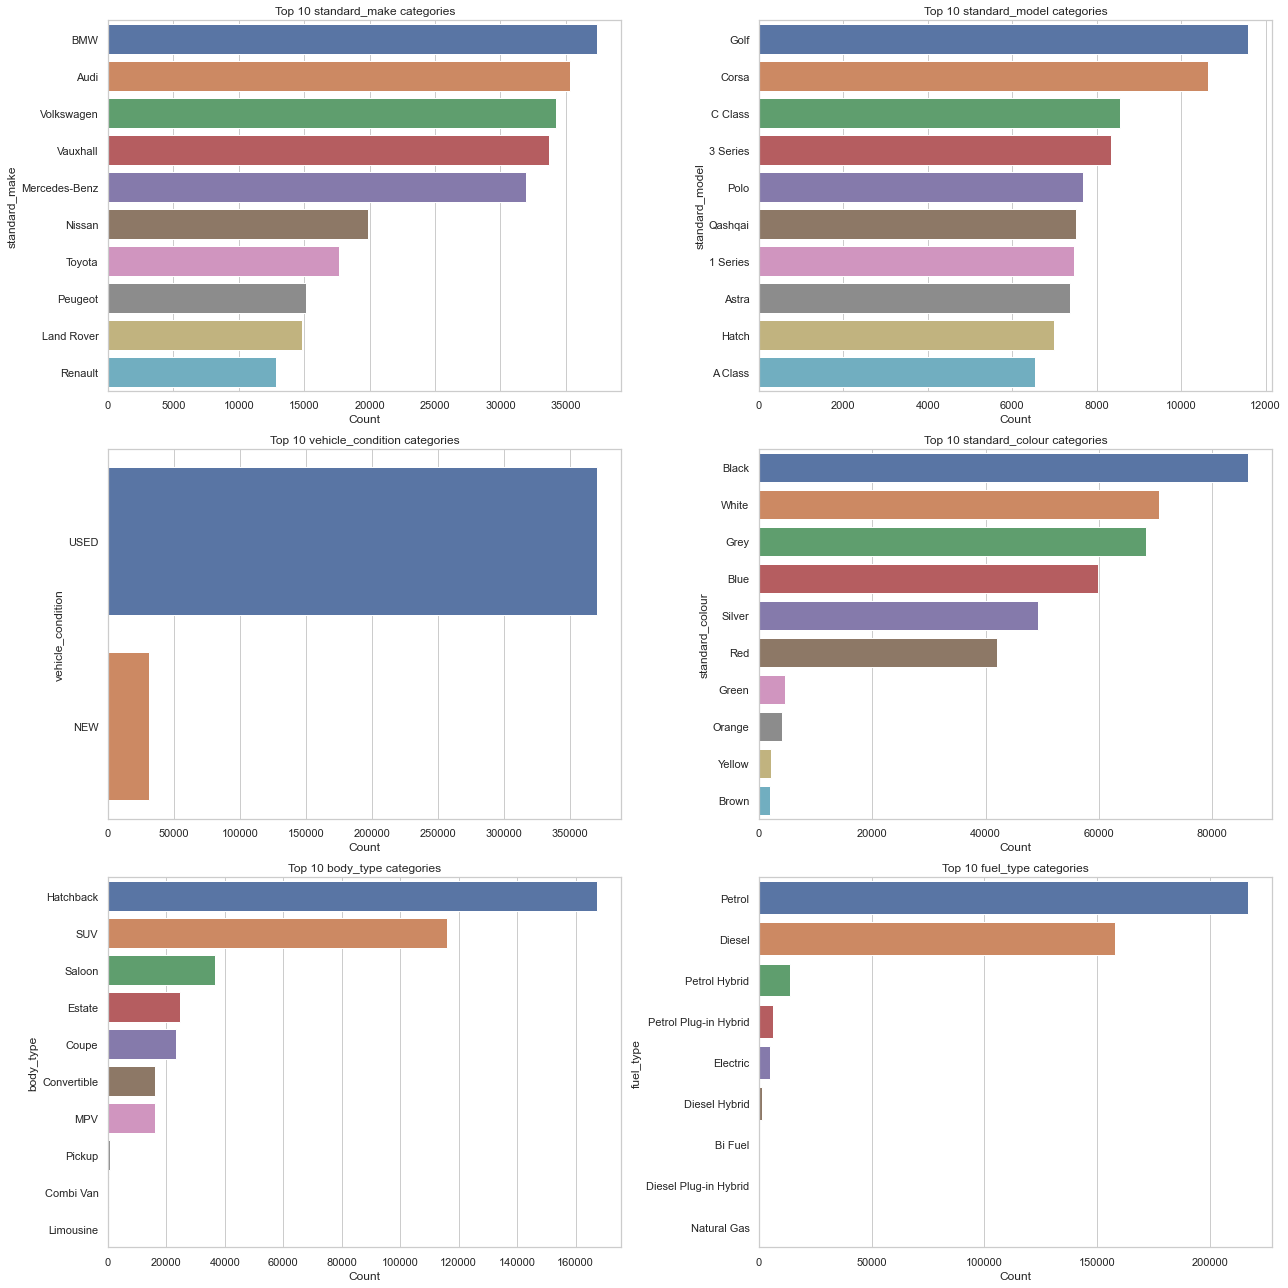

In [15]:
# Select the most informative categorical columns for plotting
selected_categoricals = ['standard_make', 'standard_model', 'vehicle_condition', 
                         'standard_colour', 'body_type', 'fuel_type']

# Plotting value counts for selected categorical columns
plt.figure(figsize=(18, 18))
for i, col in enumerate(selected_categoricals, 1):
    plt.subplot(3, 2, i)
    top_vals = df[col].value_counts().nlargest(10)
    sns.barplot(x=top_vals.values, y=top_vals.index)
    plt.title(f'Top 10 {col} categories')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()



1. `standard_make`:  
   The most common vehicle makes include brands like Ford, BMW, and Volkswagen, indicating popular manufacturer preferences in the dataset.

2. `standard_model`:  
   Models such as Golf, Corsa, and Focus appear most frequently, reflecting high availability or demand for these specific cars.

3. `vehicle_condition_USED`:  
   The majority of listings are for used vehicles, suggesting that the second-hand market dominates the dataset.

4. `standard_colour`:  
   Neutral colors like Black, White, and Grey are the most popular, aligning with typical consumer preferences.

5. `body_type`:  
   Hatchbacks and SUVs are the most common body types, indicating a preference for practical and versatile vehicles.

6. `fuel_type`:  
   Petrol and Diesel dominate the fuel types, though hybrid and electric variants also show presence, suggesting growing adoption.


In [16]:
## Handling missing values with fill na method

df['mileage'] = df['mileage'].fillna(df['mileage'].mean())

df['standard_colour'] = df['standard_colour'].fillna(df['standard_colour'].mode())
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode())
df['body_type'] = df['body_type'].fillna(df['body_type'].mode())
df['reg_code'] = df['reg_code'].fillna(df['reg_code'].mode())

df['year_of_registration'] = df['year_of_registration'].fillna(df['year_of_registration'].median())



1. `standard_colour`:  
   Mode is used because it's the most frequent color and represents the most likely missing value.

2. `fuel_type`:  
   Filling with the mode ensures the most common fuel type is used when the actual value is missing.

3. `body_type`:  
   Mode provides the most typical body type, maintaining consistency with the dataset's distribution.

4. `reg_code`:  
   Mode replaces missing registration codes with the most commonly occurring one, preserving categorical integrity.


In [17]:
# Outlier detection using IQR method for 'price', 'mileage', 'year_of_registration'

def drop_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_count = df.shape[0]
    df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)
    final_count = df.shape[0]
    print(f"{column}: Dropped {initial_count - final_count} outliers")

# Apply to relevant numerical columns
drop_outliers_iqr(df, 'price')
drop_outliers_iqr(df, 'mileage')
drop_outliers_iqr(df, 'year_of_registration')


price: Dropped 26269 outliers
mileage: Dropped 7460 outliers
year_of_registration: Dropped 19316 outliers


In [18]:
# Creating age of the vehicle to find how old is vehicle is.
current_year = 2025
df['vehicle_age'] = current_year - df['year_of_registration']

In [19]:
# Correlation Matrix for numerical features
numerical_cols = ['price', 'mileage', 'year_of_registration', 'vehicle_age']
correlation_matrix = df[numerical_cols].corr()

In [20]:
correlation_matrix

,price,mileage,year_of_registration,vehicle_age
price,1.000000,-0.520845,0.557113,-0.557113
mileage,-0.520845,1.000000,-0.719797,0.719797
year_of_registration,0.557113,-0.719797,1.000000,-1.000000
vehicle_age,-0.557113,0.719797,-1.000000,1.000000


Older vehicles and those with higher mileage tend to have lower prices.


In [21]:
# Grouped analysis: Average price by categorical features
grouped_features = ['vehicle_condition', 'fuel_type', 'body_type', 'standard_colour', 'standard_make']
average_price_by_category = {}
for feature in grouped_features:
    average_price_by_category[feature] = df.groupby(feature)['price'].mean().sort_values(ascending=False).head(10)

In [22]:
print(average_price_by_category)

{'vehicle_condition': vehicle_condition
NEW     23346.389828
USED    13477.773918
Name: price, dtype: float64, 'fuel_type': fuel_type
Diesel Plug-in Hybrid    30924.182540
Diesel Hybrid            26916.696574
Petrol Plug-in Hybrid    23734.679722
Electric                 23038.362602
Petrol Hybrid            18540.063192
Diesel                   14891.124496
Bi Fuel                  13468.578431
Petrol                   12800.751921
Name: price, dtype: float64, 'body_type': body_type
Camper         24354.961538
Minibus        20677.680328
Chassis Cab    19750.000000
Pickup         18952.997877
SUV            18027.944238
Combi Van      18019.293785
Saloon         17386.413399
Coupe          16522.489648
Convertible    15624.063464
Estate         15140.502245
Name: price, dtype: float64, 'standard_colour': standard_colour
Indigo         27000.000000
Navy           19049.750000
Multicolour    16940.129107
Grey           15808.633727
Gold           15728.909253
Black          14765.68356


1. `vehicle_condition`:  
   Shows that new vehicles command significantly higher average prices than used ones.

2. `fuel_type`:  
   Reveals that hybrid and electric vehicles tend to have higher average prices than petrol or diesel cars.

3. `body_type`:  
   Highlights that campers, SUVs, and saloons are among the most expensive body types on average.

4. `standard_colour`:  
   Indicates that some rare or luxury-associated colors like indigo or gold are linked with higher average prices.

5. `standard_make`:  
   Identifies premium brands like Tesla, Bentley, and Aston Martin as having the highest average prices.


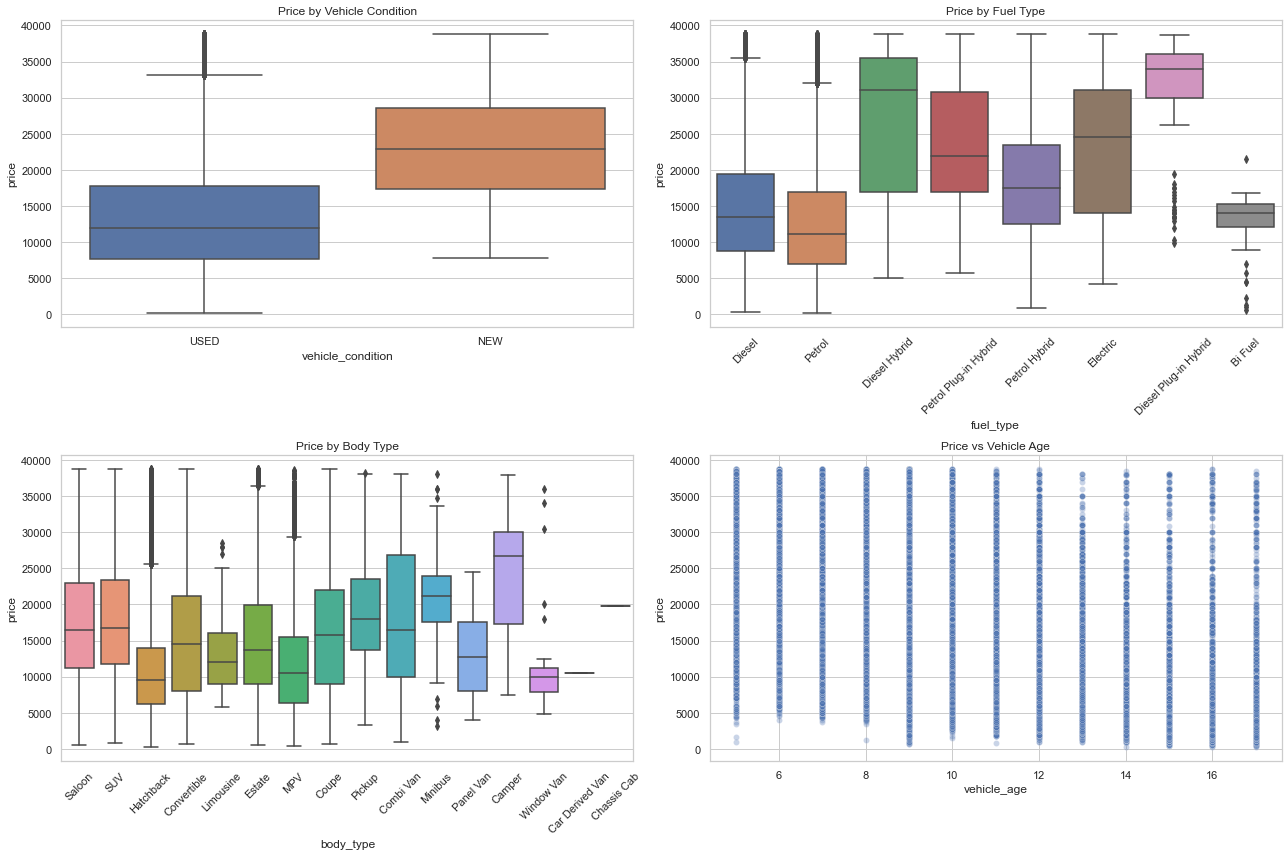

In [23]:
# Boxplots to visualize group differences
plt.figure(figsize=(18, 12))

# Vehicle Condition vs Price
plt.subplot(2, 2, 1)
sns.boxplot(x='vehicle_condition', y='price', data=df)
plt.title('Price by Vehicle Condition')

# Fuel Type vs Price
plt.subplot(2, 2, 2)
sns.boxplot(x='fuel_type', y='price', data=df)
plt.title('Price by Fuel Type')
plt.xticks(rotation=45)

# Body Type vs Price
plt.subplot(2, 2, 3)
sns.boxplot(x='body_type', y='price', data=df)
plt.title('Price by Body Type')
plt.xticks(rotation=45)

# Vehicle Age vs Price Scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x='vehicle_age', y='price', data=df, alpha=0.3)
plt.title('Price vs Vehicle Age')

plt.tight_layout()
plt.show()


1. Price by Vehicle Condition (Boxplot) 
   Shows that new vehicles have significantly higher median and upper price ranges than used ones.

2. Price by Fuel Type (Boxplot) 
   Highlights that electric and hybrid vehicles tend to have higher price distributions compared to petrol and diesel types.

3. Price by Body Type (Boxplot)
   Reveals that SUVs, saloons, and campers generally fall in higher price ranges, while hatchbacks and vans are lower.

4. Price vs Vehicle Age (Scatterplot)  
   Displays a clear negative trend, confirming that vehicle price decreases as the vehicle gets older.


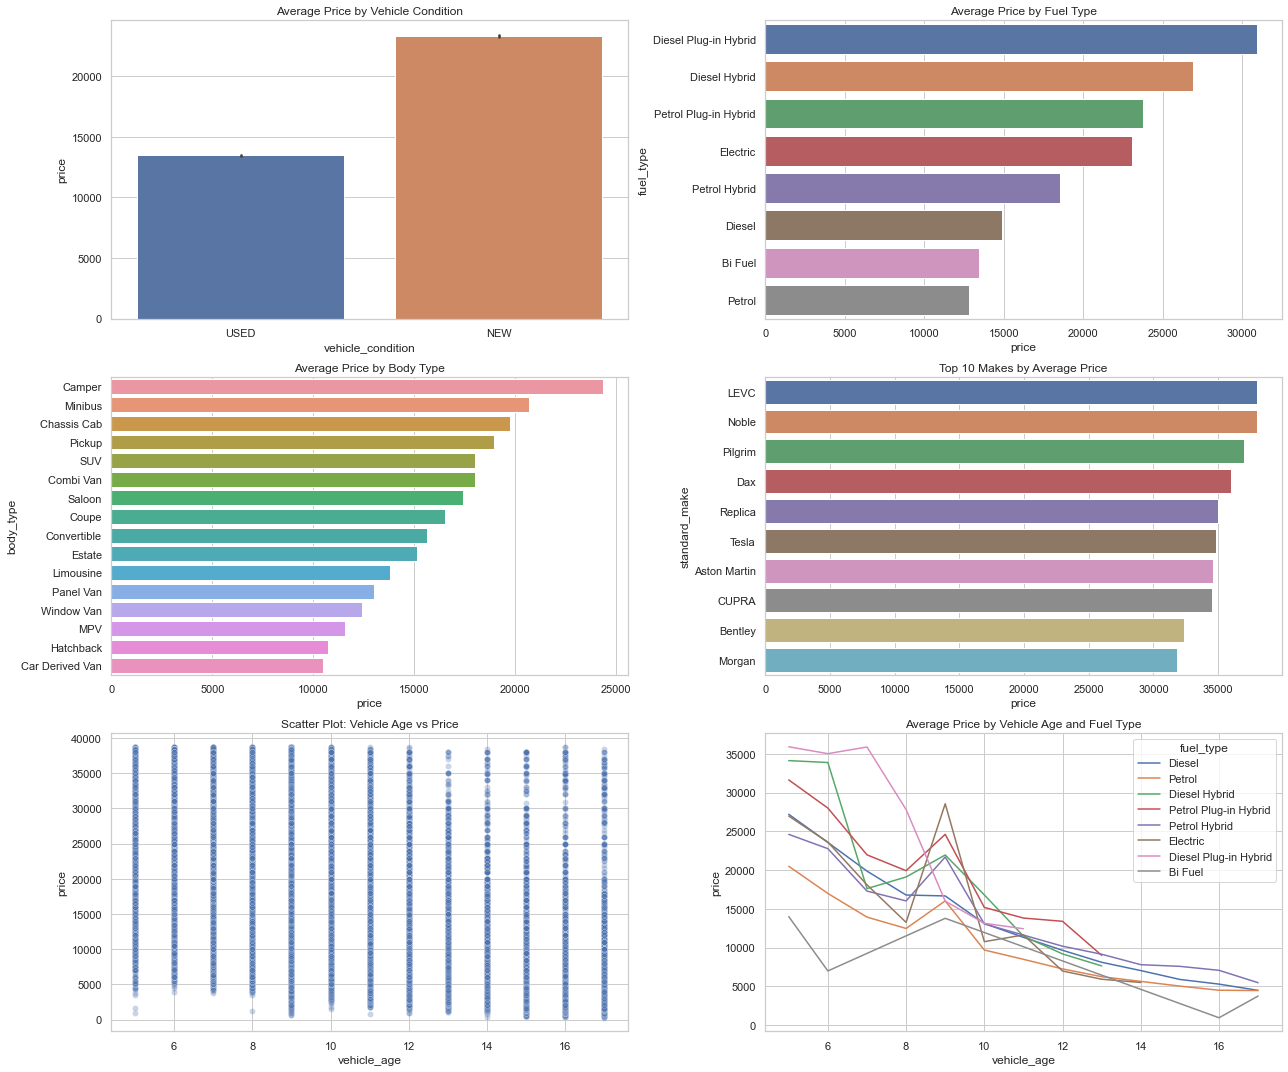

In [24]:
plt.figure(figsize=(18, 15))

# 1. Price by Vehicle Condition
plt.subplot(3, 2, 1)
sns.barplot(x='vehicle_condition', y='price', data=df)
plt.title('Average Price by Vehicle Condition')

# 2. Price by Fuel Type
plt.subplot(3, 2, 2)
fuel_avg = df.groupby('fuel_type')['price'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='price', y='fuel_type', data=fuel_avg)
plt.title('Average Price by Fuel Type')

# 3. Price by Body Type
plt.subplot(3, 2, 3)
body_avg = df.groupby('body_type')['price'].mean().sort_values(ascending=False).reset_index()
sns.barplot(x='price', y='body_type', data=body_avg)
plt.title('Average Price by Body Type')

# 4. Price by Standard Make
plt.subplot(3, 2, 4)
make_avg = df.groupby('standard_make')['price'].mean().sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='price', y='standard_make', data=make_avg)
plt.title('Top 10 Makes by Average Price')

# 5. Scatter plot: Vehicle Age vs Price
plt.subplot(3, 2, 5)
sns.scatterplot(x='vehicle_age', y='price', data=df, alpha=0.3)
plt.title('Scatter Plot: Vehicle Age vs Price')

# 6. Vehicle Age vs Price by Fuel Type
plt.subplot(3, 2, 6)
sns.lineplot(x='vehicle_age', y='price', hue='fuel_type', data=df, estimator='mean', ci=None)
plt.title('Average Price by Vehicle Age and Fuel Type')

plt.tight_layout()
plt.show()


1. Average Price by Vehicle Condition:  
    - NEW vehicles are considerably more expensive than USED ones.
   
2. Average Price by Fuel Type
   - Hybrid and Electric vehicles are priced significantly higher.
   - Petrol and Diesel vehicles fall in the lower range.

3. Average Price by Body Type  
   - Campers and SUVs dominate the premium price segment.
   - Hatchbacks and smaller vehicles are more affordable.

4. Top 10 Makes by Average Price  
   - Brands like Tesla, Bentley, and Aston Martin stand out as luxury brands.

5. Scatter Plot: Vehicle Age vs Price  
   - A clear negative trend: as vehicles age, price drops consistently.

6. Average Price by Vehicle Age and Fuel Type  
   - EVs and Hybrids retain value better in early years.
   - Petrol/Diesel vehicles depreciate faster with age.



In [25]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,vehicle_age
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel,14.0
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol,8.0
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel,9.0
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel,10.0
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol,8.0


In [26]:
# One-hot encode 'vehicle_condition' and 'crossover_car_and_van'
df = pd.get_dummies(df, columns=['vehicle_condition', 'crossover_car_and_van'], drop_first=True)


In [27]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
label_cols = ['standard_colour', 'reg_code','standard_make', 'standard_model', 'body_type', 'fuel_type']

# Apply LabelEncoder to each column
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = df.drop(columns=['price', 'public_reference'])  # exclude price and identifier
y = df['price']

# Split into training and testing sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluateS
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Get top 10 feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(10)

rmse, r2, importances


(2150.906145523881,
 0.9297923566647159,
 vehicle_age                   0.193022
 standard_make                 0.169298
 body_type                     0.148666
 mileage                       0.142680
 standard_model                0.135164
 year_of_registration          0.129119
 fuel_type                     0.045854
 reg_code                      0.020683
 standard_colour               0.011414
 crossover_car_and_van_True    0.002062
 dtype: float64)

Top Predictors 3 of Vehicle Price:

1. `vehicle_age` (0.193) –  Age is the strongest predictor: newer vehicles tend to cost more, reflecting depreciation.

2. `standard_make` (0.169) –  The car brand significantly affects price: luxury brands (e.g., Tesla, Bentley) boost value.

3. `body_type` (0.149) –  Vehicle style matters: SUVs, saloons, and campers generally command higher prices.


ACCURACY:
- RMSE (Root Mean Squared Error): `2150.91`  
- R² Score: `0.9298` : Almost 93% accuracy in explaining variance in vehicle price. 

